# Homework Wine Classification using Decision Trees

By Kevin Trejos Vargas

ID: B26708

1st semester of 2024

In [ ]:
#import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
# Dataset import
from sklearn.datasets import load_wine

In [ ]:
# Read dataset
wine_data = load_wine()
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)


In [ ]:
df['label'] = wine_data.target
# Show dataset structure
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
# Describe
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
df.info()

# There are no null cells

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

**Data definition**

• Alcohol: Continuous variable, the range varies.

• Malic Acid: Continuous variable, the range varies.

• Ash: Continuous variable, the range varies.

• Alkalinity of Ash: Continuous variable, the range varies.

• Magnesium: Continuous variable, the range varies.

• Total Phenols: Continuous variable, the range varies.

• Flavonoids: Continuous variable, the range varies.

• Non-Flavonoid Phenols: Continuous variable, the range varies.

• Proanthocyanins: Continuous variable, the range varies.

• Color Intensity: Continuous variable, the range varies.

• Hue: Continuous variable, the range varies.

• OD280/OD315 of Diluted Wines: Continuous variable, the range varies.

• Proline: Continuous variable, the range varies.

In [ ]:
# Get the features to be used for classification
features = df.drop('label', axis = 1).columns.tolist()
X = pd.get_dummies(df[features])
y = df['label']

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


In [ ]:
# Create Decision Tree classifier without pruning
clf_unpruned = DecisionTreeClassifier(random_state = 1)
clf_unpruned.fit(X_train, y_train)
y_pred_unpruned = clf_unpruned.predict(X_test)

In [ ]:
# Generate confusion matrix and evaluation scores for unpruned tree
conf_matrix_unpruned = confusion_matrix(y_test, y_pred_unpruned)

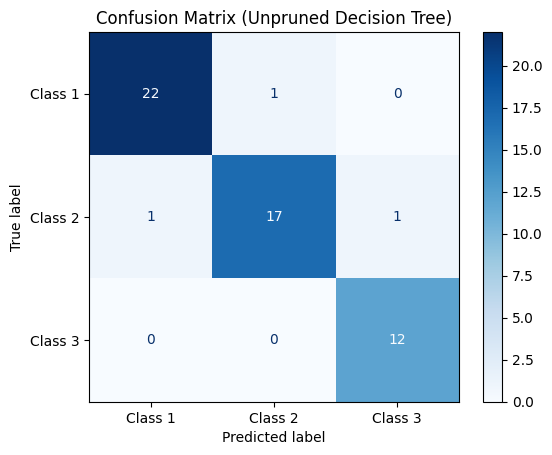

In [ ]:
# Confusion Matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix = conf_matrix_unpruned,
    display_labels=["Class 1", "Class 2","Class 3"]
)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Unpruned Decision Tree)')
plt.show()

In [ ]:
print("\nClassification Report (Unpruned Decision Tree):")
print(classification_report(y_test, y_pred_unpruned))


Classification Report (Unpruned Decision Tree):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.94      0.89      0.92        19
           2       0.92      1.00      0.96        12

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.94      0.94      0.94        54



In [ ]:
# Compare performance with different depts.

# Create Decision Trees with different max depths
max_depths = [2, 3, 4, 5]
clfs_pruned = []

for max_depth in max_depths:
    clf_pruned = DecisionTreeClassifier(
        max_depth = max_depth, random_state = 1
    )
    clf_pruned.fit(X_train, y_train)
    clfs_pruned.append(clf_pruned)

# Evaluate Decision Trees with different max depths
evaluation_scores = []

for clf_pruned in clfs_pruned:
    y_pred_pruned = clf_pruned.predict(X_test)
    conf_matrix_pruned = confusion_matrix(y_test, y_pred_pruned)
    evaluation_scores.append(
        classification_report(
            y_test, y_pred_pruned, output_dict = True
        )
    )


In [ ]:
# Plot evaluation scores for Decision Trees with different max depths
precision_scores = [score['1']['precision'] for score in evaluation_scores]
recall_scores = [score['1']['recall'] for score in evaluation_scores]
f1_scores = [score['1']['f1-score'] for score in evaluation_scores]

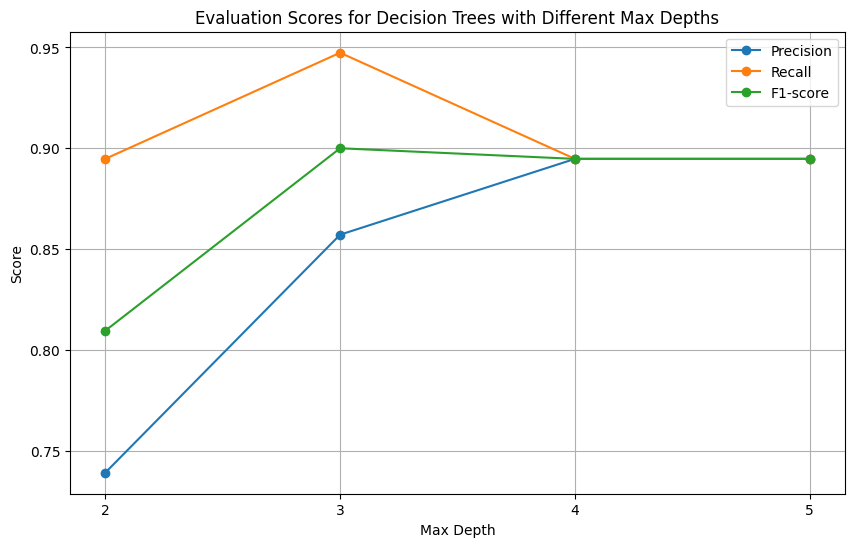

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(max_depths, precision_scores, marker = 'o', label = 'Precision')
plt.plot(max_depths, recall_scores, marker = 'o', label = 'Recall')
plt.plot(max_depths, f1_scores, marker = 'o', label = 'F1-score')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title(
    'Evaluation Scores for Decision Trees with Different Max Depths'
)
plt.legend()
plt.grid(True)
plt.xticks(max_depths)
plt.show()

**************************************************
Tree with depth = 2
**************************************************


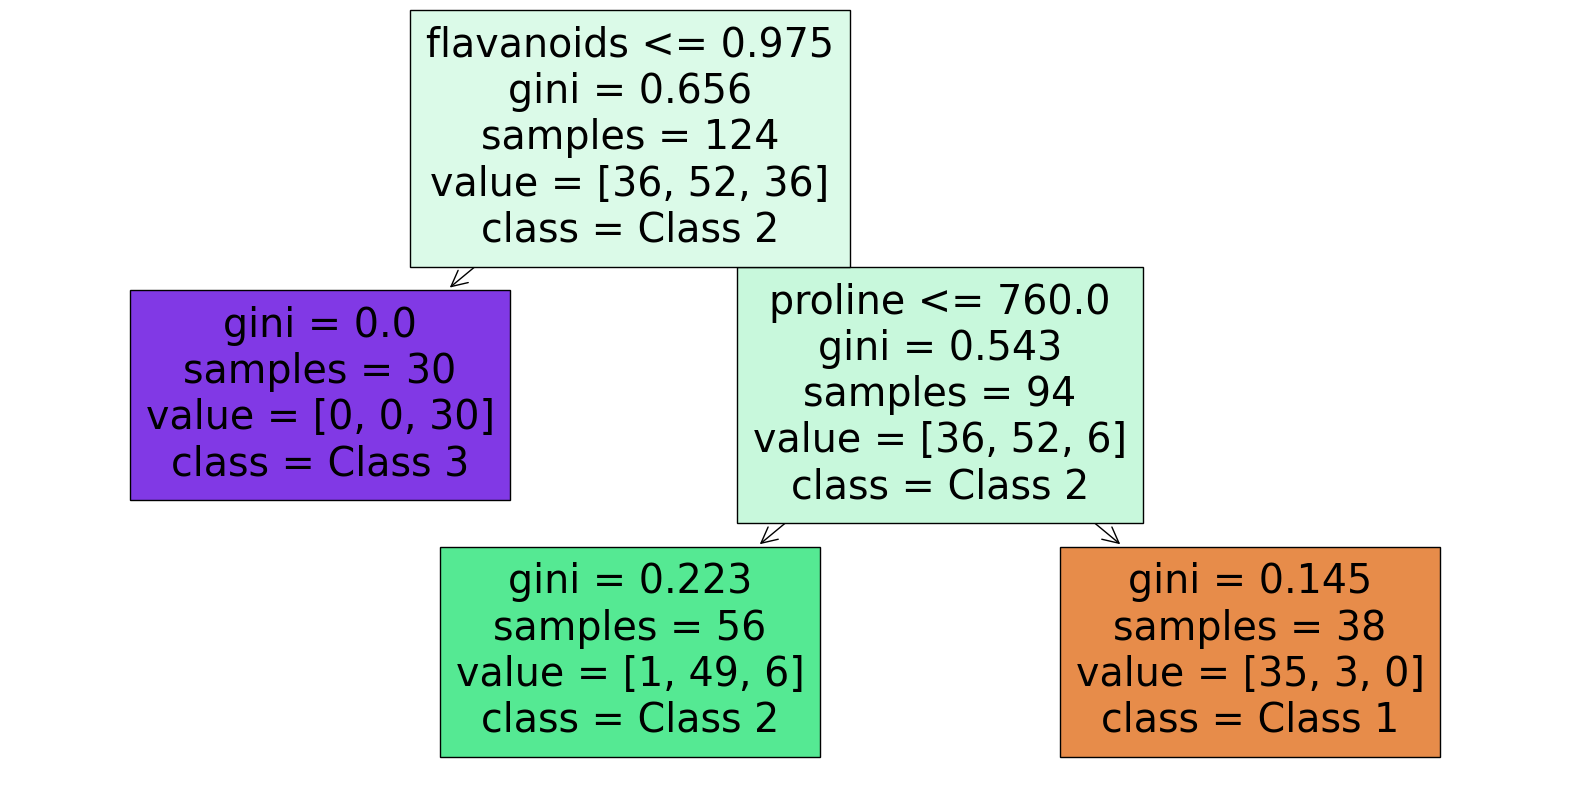

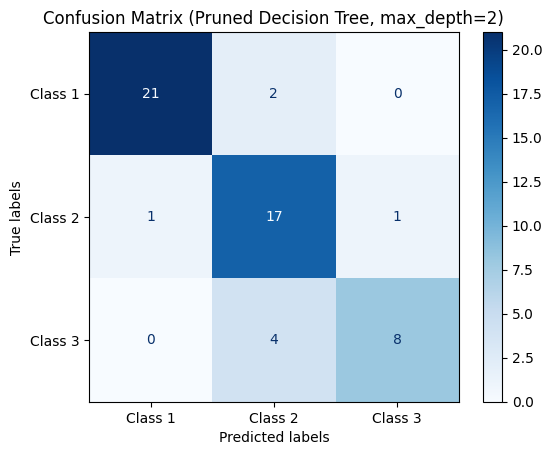


Classification Report (Pruned Decision Tree, max_depth=2):
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.74      0.89      0.81        19
           2       0.89      0.67      0.76        12

    accuracy                           0.85        54
   macro avg       0.86      0.82      0.83        54
weighted avg       0.86      0.85      0.85        54

**************************************************
Tree with depth = 3
**************************************************


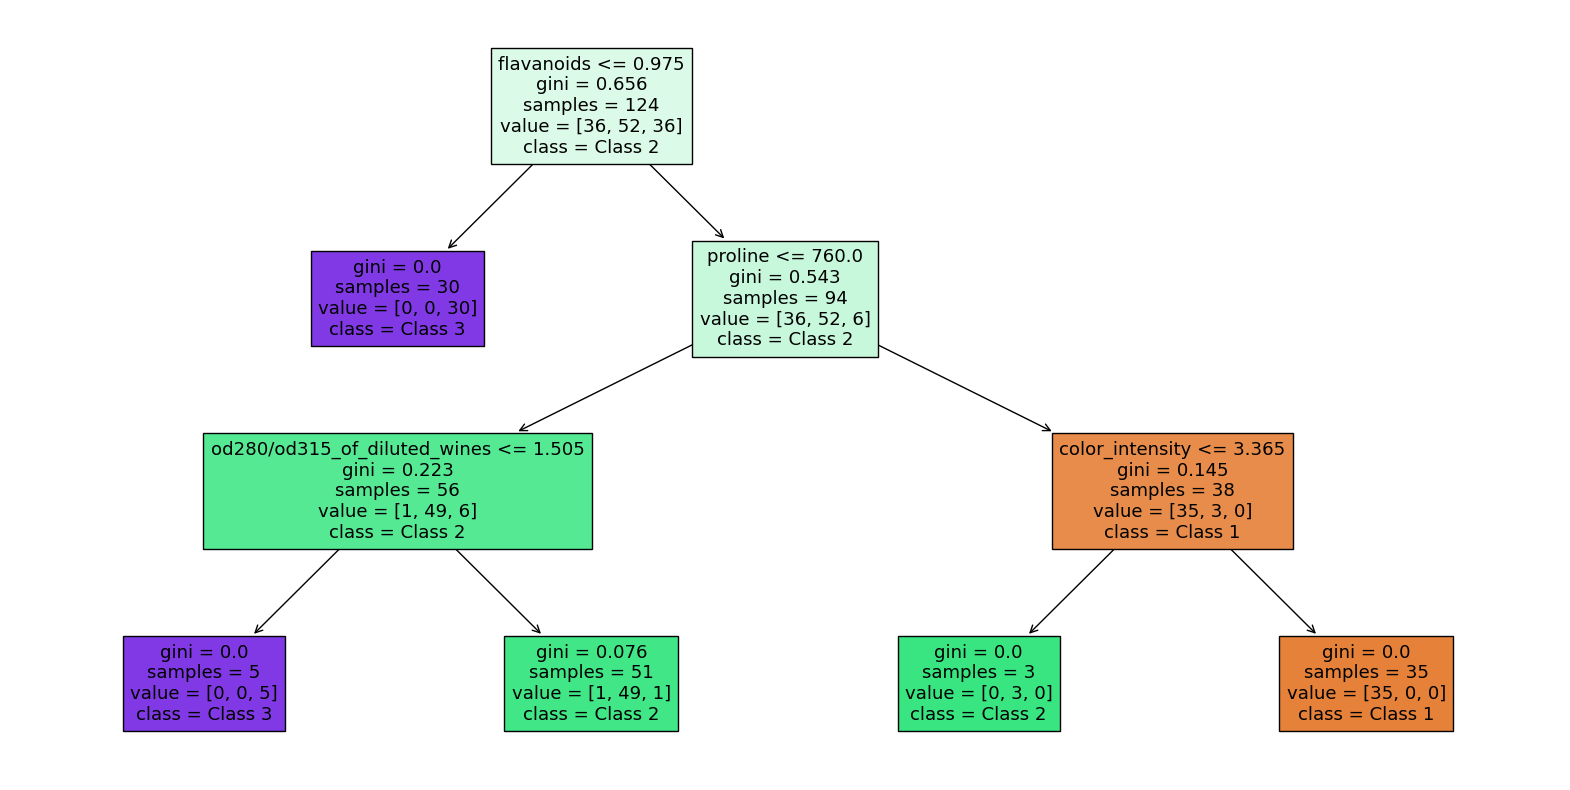

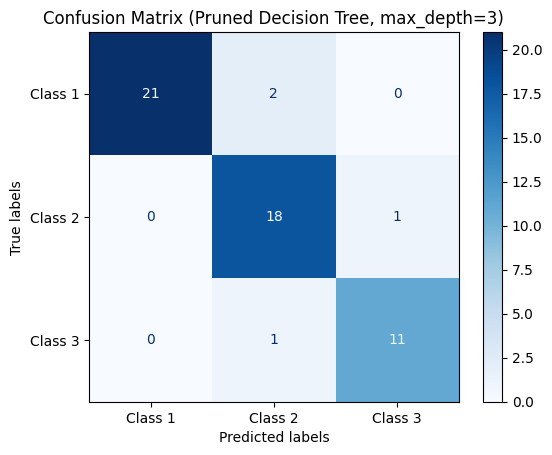


Classification Report (Pruned Decision Tree, max_depth=3):
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       0.86      0.95      0.90        19
           2       0.92      0.92      0.92        12

    accuracy                           0.93        54
   macro avg       0.92      0.93      0.92        54
weighted avg       0.93      0.93      0.93        54

**************************************************
Tree with depth = 4
**************************************************


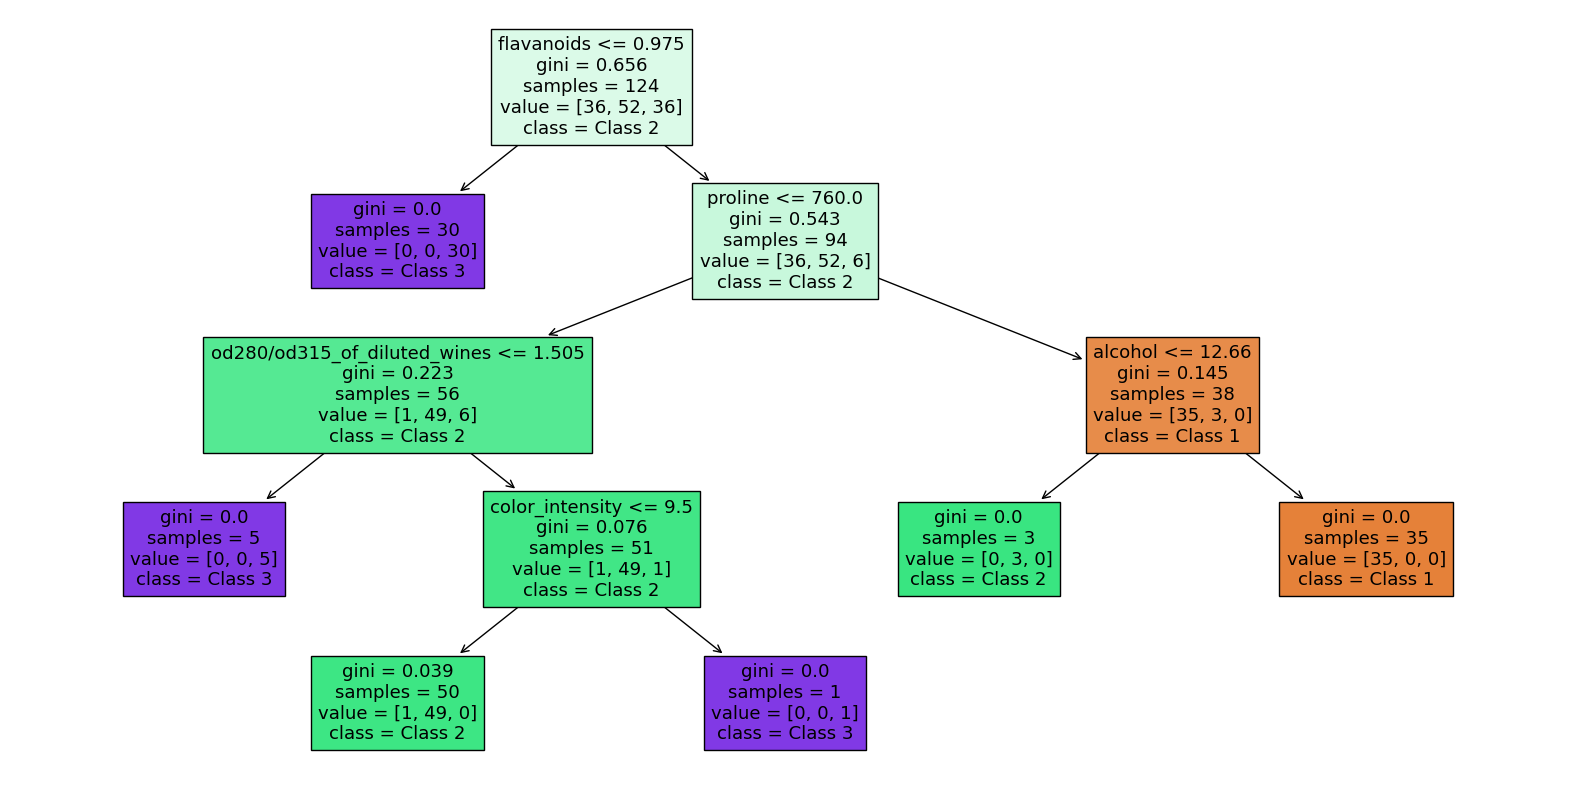

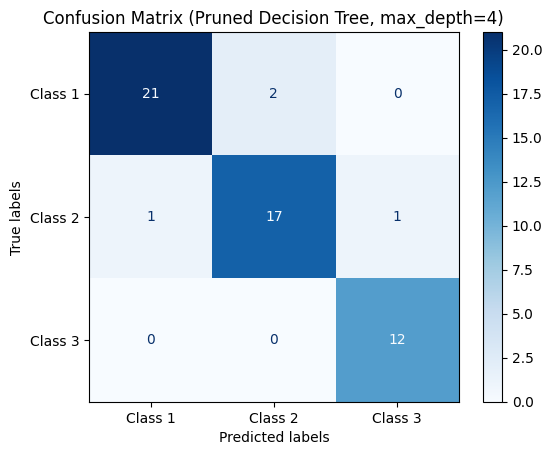


Classification Report (Pruned Decision Tree, max_depth=4):
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.89      0.89      0.89        19
           2       0.92      1.00      0.96        12

    accuracy                           0.93        54
   macro avg       0.92      0.94      0.93        54
weighted avg       0.93      0.93      0.93        54

**************************************************
Tree with depth = 5
**************************************************


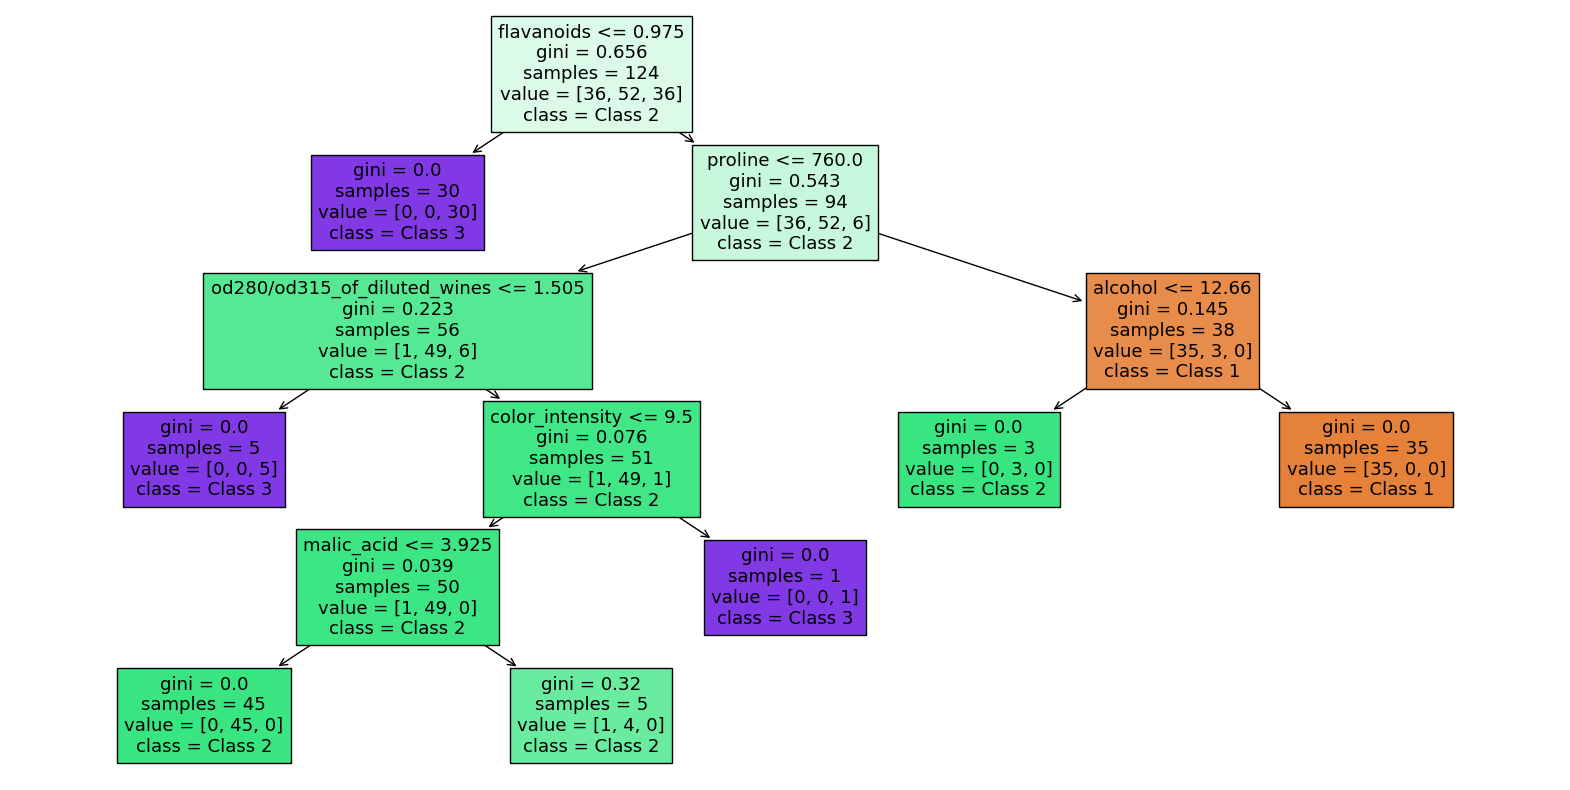

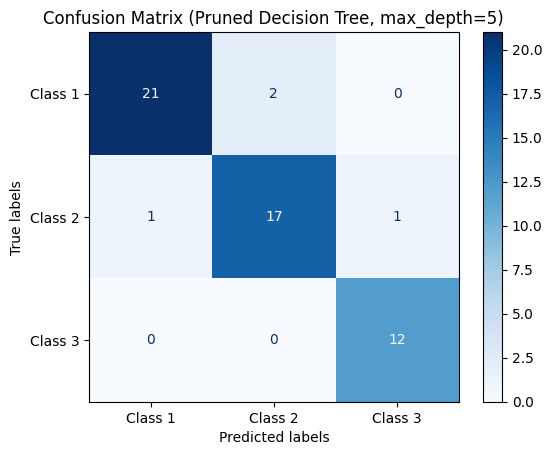


Classification Report (Pruned Decision Tree, max_depth=5):
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.89      0.89      0.89        19
           2       0.92      1.00      0.96        12

    accuracy                           0.93        54
   macro avg       0.92      0.94      0.93        54
weighted avg       0.93      0.93      0.93        54



In [ ]:
# Plot confusion matrices for Decision Trees with different max depths
for i, max_depth in enumerate(max_depths):

    clf_pruned = clfs_pruned[i]
    y_pred_pruned = clf_pruned.predict(X_test)
    conf_matrix_pruned = confusion_matrix(y_test, y_pred_pruned)

    # Visualizar el arbol
    print("*" * 50)
    print(f"Tree with depth = {max_depth}")
    print("*" * 50)
    plt.figure(figsize=(20,10))
    plot_tree(
        clf_pruned, filled=True, feature_names=X.columns,
        class_names=["Class 1", "Class 2","Class 3"]
    )
    plt.show()

    disp_pruned = ConfusionMatrixDisplay(
        confusion_matrix=conf_matrix_pruned,
        display_labels=["Class 1", "Class 2","Class 3"]
    )
    disp_pruned.plot(cmap='Blues', values_format='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(
        f'Confusion Matrix (Pruned Decision Tree, max_depth={max_depth})'
    )
    plt.show()

    print(
        f"\nClassification Report (Pruned Decision Tree, max_depth={max_depth}):"
    )
    print(classification_report(y_test, y_pred_pruned))

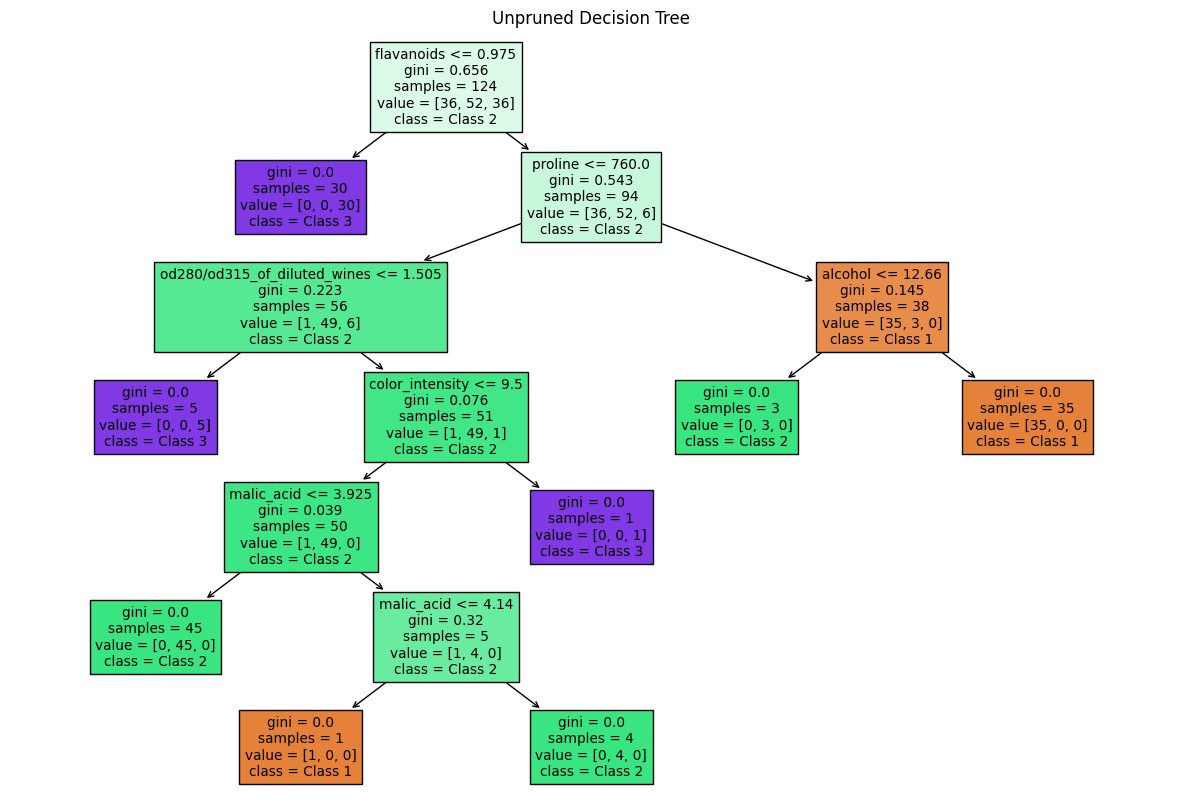

In [ ]:
# Print unprunned tree
plt.figure(figsize=(15, 10))
plot_tree(
    clf_unpruned,
    feature_names = X.columns,
    class_names=["Class 1", "Class 2","Class 3"], filled = True
)
plt.title("Unpruned Decision Tree")
plt.show()

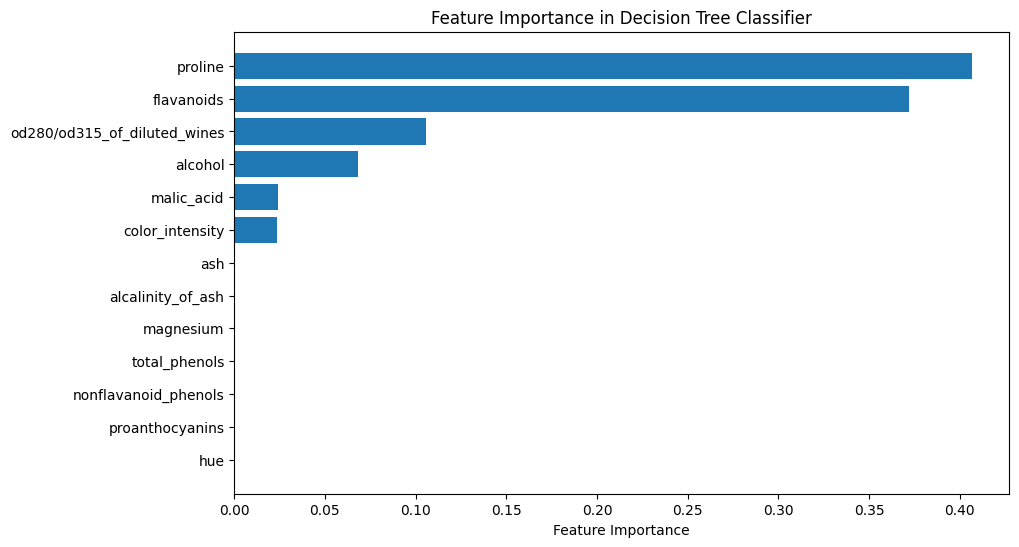

                         Feature  Importance
12                       proline    0.406853
6                     flavanoids    0.371834
11  od280/od315_of_diluted_wines    0.105571
0                        alcohol    0.067982
1                     malic_acid    0.024111
9                color_intensity    0.023648
2                            ash    0.000000
3              alcalinity_of_ash    0.000000
4                      magnesium    0.000000
5                  total_phenols    0.000000
7           nonflavanoid_phenols    0.000000
8                proanthocyanins    0.000000
10                           hue    0.000000


In [ ]:
# Obtener la importancia de las características
feature_importances = clf_unpruned.feature_importances_
feature_names = X.columns

# Crear un DF
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenar por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar los features
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_names)), importance_df['Importance'], align='center')
plt.yticks(np.arange(len(feature_names)), importance_df['Feature'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree Classifier')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()

# Print feature importances
print(importance_df)